In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json, pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# dataset path
dataset_path = '/content/drive/My Drive/Colab Notebooks/'
path = '/content/drive/My Drive/Colab Notebooks/'


In [3]:
!pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.1.0


In [4]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [5]:
print(tf.keras.__version__)

2.12.0


#Importing Dataset

In [6]:
# Read the data
data = pd.read_csv(dataset_path+'headliness_ch.csv',encoding='utf-8')
print(f'Total number of Documents: {len(data)}')
print(data)

Total number of Documents: 18
                                                 Text    Category  \
0   দেশের ঐতিহ্যবাহী দল বাংলাদেশ আওয়ামী লীগের ২২তম...    Politics   
1   চার দিন পরেই দেশের প্রথম মেট্রোরেল উদ্বোধন করা...    Politics   
2   শিশুর জন্য দুধ বা দুগ্ধজাতীয় খাবার খুবই উপকারী...      Health   
3   ফলে আমাদের পাকস্থলী সহজে একে শোষণ করতে পারে। শ...      Health   
4   বাংলাদেশের বাজারে শতভাগ পুনর্ব্যবহৃত বা রিসাইক...   Corporate   
5   বাংলাদেশ সরকারি কর্ম কমিশন (পিএসসি) একাধিক নন-...  Employment   
6   বিসিএসের স্বপ্নপূরণের প্রথম পদক্ষেপ হলো সঠিকভা...      Chakri   
7   এখানে একটা সুন্দর বিশ্ববিদ্যালয় (জাহাঙ্গীরনগর ...   Amusement   
8           এবার শুটিং সেটে সালমানকে অতএব হত্যাচেষ্টা   Lifestyle   
9   স্মৃতি। অনেক অনেক স্মৃতি, যেগুলো পুরোনো অনেক স...   Lifestyle   
10  চিত্রনাট্যটা ছিল উত্থান-পতন, হাসি-কান্না, দ্বন...   Lifestyle   
11  কিন্তু তাতে কী? আগে থেকেই তো ঠিক করা আছে, ব্র...     Opinion   
12  কেরানীগঞ্জ থেকে সদরঘাট আসতে খুব একটা সময় লাগল ...   Amusement   
13  

In [7]:
data = data[['Text','Category']]

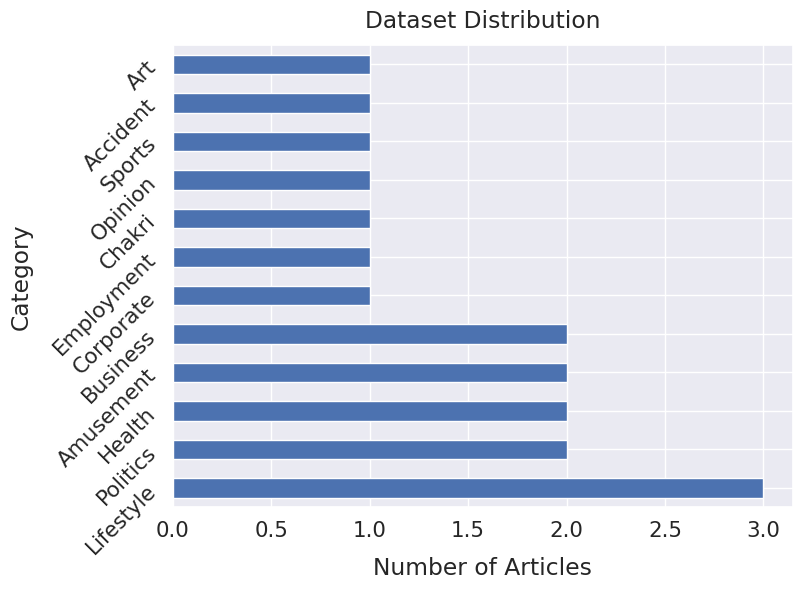

In [8]:
# Plot the Class distribution
sns.set(font_scale=1.4)
data['Category'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Articles", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

The dataset has total 12 News Categories data and politics class has maximum number of articles. 

#Data Preparation and Cleaning

In [9]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_documents(articles):
      '''
      This function will clean the news articles by removing punctuation marks and stopwords.

      Args:
      articles: a news text(str)

      returns:
      news: clean text (str)
      '''
      news = articles.replace('\n',' ')
      news = re.sub('[^\u0980-\u09FF]',' ',str(news)) #removing unnecessary punctuation
      # stopwords removal
      stp = open(path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
      result = news.split()
      news = [word.strip() for word in result if word not in stp ]
      news =" ".join(news)
      return news

In [10]:
# Apply the function into the dataframe
data['cleaned'] = data['Text'] 
print(data)

                                                 Text    Category  \
0   দেশের ঐতিহ্যবাহী দল বাংলাদেশ আওয়ামী লীগের ২২তম...    Politics   
1   চার দিন পরেই দেশের প্রথম মেট্রোরেল উদ্বোধন করা...    Politics   
2   শিশুর জন্য দুধ বা দুগ্ধজাতীয় খাবার খুবই উপকারী...      Health   
3   ফলে আমাদের পাকস্থলী সহজে একে শোষণ করতে পারে। শ...      Health   
4   বাংলাদেশের বাজারে শতভাগ পুনর্ব্যবহৃত বা রিসাইক...   Corporate   
5   বাংলাদেশ সরকারি কর্ম কমিশন (পিএসসি) একাধিক নন-...  Employment   
6   বিসিএসের স্বপ্নপূরণের প্রথম পদক্ষেপ হলো সঠিকভা...      Chakri   
7   এখানে একটা সুন্দর বিশ্ববিদ্যালয় (জাহাঙ্গীরনগর ...   Amusement   
8           এবার শুটিং সেটে সালমানকে অতএব হত্যাচেষ্টা   Lifestyle   
9   স্মৃতি। অনেক অনেক স্মৃতি, যেগুলো পুরোনো অনেক স...   Lifestyle   
10  চিত্রনাট্যটা ছিল উত্থান-পতন, হাসি-কান্না, দ্বন...   Lifestyle   
11  কিন্তু তাতে কী? আগে থেকেই তো ঠিক করা আছে, ব্র...     Opinion   
12  কেরানীগঞ্জ থেকে সদরঘাট আসতে খুব একটা সময় লাগল ...   Amusement   
13  শুধু তা–ই নয়, পছন্দের ক্লাব আর

In [11]:
# print some cleaned documents from the dataset
sample_data = [10]
for i in sample_data:
  print('Original:\n',data.Text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Category:-- ',data.Category[i],'\n')   

Original:
 চিত্রনাট্যটা ছিল উত্থান-পতন, হাসি-কান্না, দ্বন্দ্ব-সংঘাত, ক্লাইমেক্সে ঠাসা। অক্সফোর্ড বলবে, এবার চ্যাম্পিয়ন হবে ব্রাজিল। ফাইনাল হবে বেলজিয়ামের সঙ্গে। আর ফিফার গেমসাইট বলবে, এবার চ্যাম্পিয়ন হবে আর্জেন্টিনা। এর আগের দুবারও ফিফা গেম যা বলেছিল, তা-ই হয়েছে। জার্মানি এবং ফ্রান্স চ্যাম্পিয়ন হবে, এই ছিল তাদের ভবিষ্যদ্বাণী। এবার তাদের পূর্বাভাস ছিল, চ্যাম্পিয়ন হবে আর্জেন্টিনা। ফিফা গেমের ভবিষ্যদ্বাণী কি আর বৃথা যায়? 
Cleaned:
 চিত্রনাট্যটা ছিল উত্থান-পতন, হাসি-কান্না, দ্বন্দ্ব-সংঘাত, ক্লাইমেক্সে ঠাসা। অক্সফোর্ড বলবে, এবার চ্যাম্পিয়ন হবে ব্রাজিল। ফাইনাল হবে বেলজিয়ামের সঙ্গে। আর ফিফার গেমসাইট বলবে, এবার চ্যাম্পিয়ন হবে আর্জেন্টিনা। এর আগের দুবারও ফিফা গেম যা বলেছিল, তা-ই হয়েছে। জার্মানি এবং ফ্রান্স চ্যাম্পিয়ন হবে, এই ছিল তাদের ভবিষ্যদ্বাণী। এবার তাদের পূর্বাভাস ছিল, চ্যাম্পিয়ন হবে আর্জেন্টিনা। ফিফা গেমের ভবিষ্যদ্বাণী কি আর বৃথা যায়? 
 Category:--  Lifestyle 



In [15]:
# Stopwords pickle 
stp = open(path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
# open a file, where you ant to store the data
file = open(path+'bangla_stopwords.pkl', 'wb')
# dump information to that file
pickle.dump(stp, file)

In [16]:
stp = open(path+'bangla_stopwords.pkl','rb')
stp = pickle.load(stp)
len(stp)

398

## Handle Low Length Documents

In [17]:
# Calculate the Length of each Document
data['Length'] = data.cleaned.apply(lambda x:len(x.split()))

# Remove the Documents with least words
dataset = data.loc[data.Length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Documents".format(len(data)-len(dataset)),
      "\nTotal Remaining Documents:",len(dataset))

After Cleaning: 
Removed 0 Small Documents 
Total Remaining Documents: 18


In [18]:
# Save the Cleaned data for reuse
dataset.to_csv(dataset_path+'cleaned_news.csv')

In [19]:
# Load the Cleaned News
dataset = pd.read_csv(dataset_path+'cleaned_news.csv')
dataset.columns

Index(['Unnamed: 0', 'Text', 'Category', 'cleaned', 'Length'], dtype='object')

#Document Length Distribution

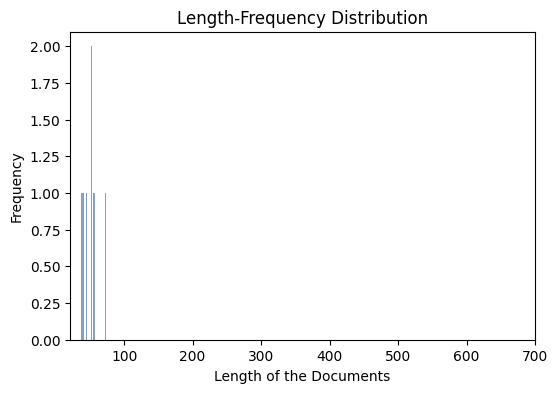

Maximum Length of a Document: 73
Minimum Length of a Document: 6
Average Length of a Document: 44.0


In [20]:
import matplotlib
matplotlib.rc_file_defaults()
frequency = dict()
for i in dataset.Length:
    frequency[i] = frequency.get(i, 0)+1

plt.figure(figsize = (6,4))
plt.bar(frequency.keys(), frequency.values(), color=(0.2, 0.4, 0.6, 0.6))
plt.xlim(21, 700)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Documents')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
#plt.savefig(path+'len_dist.png',dpi = 1000,bbox_inches ='tight')
plt.show()  
print(f"Maximum Length of a Document: {max(dataset.Length)}")
print(f"Minimum Length of a Document: {min(dataset.Length)}")
print(f"Average Length of a Document: {round(np.mean(dataset.Length),0)}")


# Dataset Summary

In [21]:
def data_summary(dataset):
  '''
  This function will print the summary of the dataset

  Args:
  dataset: cleaned texts

  returns:
  documents: Number of document per class
  words: Number of words per class
  u_words: Number of unique words per class
  class_label: name of the categories
  '''
  documents = []
  words = []
  u_words = []
  #total_u_word = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
  # find class names
  class_label = [k for k,v in dataset.Category.value_counts().to_dict().items()]
  for label in class_label: 
    word_list = [word.strip().lower() for t in list(dataset[dataset.Category==label].cleaned) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
      counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list  
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Documents per class
    documents.append(len(list(dataset[dataset.Category==label].cleaned)))
    # Total Word per class
    words.append(len(word_list))
    # Unique words per class 
    u_words.append(len(np.unique(word_list)))
       
    print("\nClass Name : ",label)
    print("Number of Documents:{}".format(len(list(dataset[dataset.Category==label].cleaned))))  
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Most Frequent Words:\n")
    for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))
  return documents,words,u_words,class_label

# pass the whole dataset into the function

documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Lifestyle
Number of Documents:3
Number of Words:104
Number of Unique Words:85
Most Frequent Words:

এবার	4
চ্যাম্পিয়ন	4
হবে	4
অনেক	3
আর	3
এটা	2
ছিল	2
বলবে,	2
আর্জেন্টিনা।	2
ফিফা	2

Class Name :  Politics
Number of Documents:2
Number of Words:64
Number of Unique Words:59
Most Frequent Words:

দেশের	2
সম্মেলন	2
শুরু	2
সেবা	2
মোবাইল	2
ঐতিহ্যবাহী	1
দল	1
বাংলাদেশ	1
আওয়ামী	1
লীগের	1

Class Name :  Health
Number of Documents:2
Number of Words:97
Number of Unique Words:76
Most Frequent Words:

ও	3
দুধে	3
অসহিষ্ণুতা	3
ল্যাকটোজ	3
শিশুর	2
জন্য	2
দুধ	2
বা	2
দুগ্ধজাতীয়	2
খাবার	2

Class Name :  Amusement
Number of Documents:2
Number of Words:96
Number of Unique Words:86
Most Frequent Words:

একটা	3
আর	2
কোনো	2
ঘুরে	2
চেষ্টা	2
করছি।	2
সময়	2
নেই।	2
ফাঁকা	2
এখানে	1

Class Name :  Business
Number of Documents:2
Number of Words:74
Number of Unique Words:66
Most Frequent Words:

বিনিয়োগ	2
করা	2
বাংলাদেশ	2
নিয়োগের	2
জন্য	2
স্বতন্ত্র	2
পরিচালকের	2
তালিকা	2
আর্থিক	1
অনিয়মের	1

Class Name :  Co

In [22]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data_matrix

,Total Documents,Total Words,Unique Words,Class Names
0,3,104,85,Lifestyle
1,2,64,59,Politics
2,2,97,76,Health
3,2,96,86,Amusement
4,2,74,66,Business
5,1,52,51,Corporate
6,1,40,38,Employment
7,1,39,33,Chakri
8,1,73,63,Opinion
9,1,55,52,Sports


## Data Summary Visualization

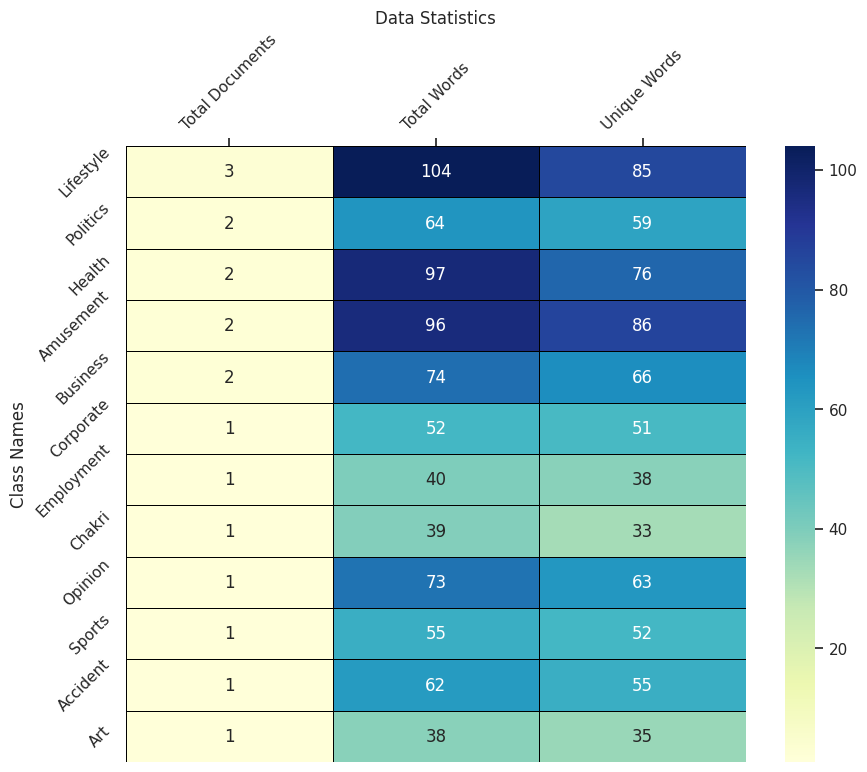

In [23]:
sns.set()
plt.figure(figsize =(10, 8))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)
# labels, title and ticks
ax.set_ylabel('Class Names') 
ax.set_title('Data Statistics')
y_label = ["Total Documents", "Total Words", "Unique Words"] 
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()


#Label Encoding and Dataset Splitting

In [24]:
                   #===========================================================
                   ################# Label Encoding Function ##################
                   #===========================================================
def label_encoding(dataset,bool):
  '''
  This function will convert categorical class names into a numeric label

  Args:
  dataset: A dataset
  bool : a boolean (True or False)

  returns:
  labels: encoded labels 
  '''
  le = LabelEncoder()
  le.fit(dataset.Category)
  encoded_labels = le.transform(dataset.Category)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels  

                   #===========================================================
                   ################# Dataset Splitting Function ###############
                   #=========================================================== 

def dataset_split(news,category):
  '''
  This function will split the dataset into Train-Test-Validation set

  Args:
  news: encoded texts
  category: class names

  returns:
  X_train: Encoded Training News  
  X_valid: Encoded Validation News
  X_test:  Encoded Test news
  y_train: Encoded Training labels
  y_valid: Encoded Validation labels
  y_test:  Encoded Test labels
  '''

  X,X_test,y,y_test = train_test_split(news,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])
  
  return X_train,X_valid,X_test,y_train,y_valid,y_test


#Tokenizer

In [25]:
def encoded_texts(dataset,padding_length,max_words):

  '''
  This function will encoded the text into a sequence of numbers

  Args:
  dataset: a dataset
  padding_length: maximum length of a encoded texte
  max_words : Number of words 

  returns:
  corpus: Number of encoded texts
  labels: encoded labels
  '''
  
  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
  
 

 # Fit the tokenizer
  tokenizer.fit_on_texts(dataset.cleaned)
  #============================== Tokenizer Info =================================
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  #=============================== Print all the information =========================
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )    
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(dataset.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))  
  # print(dataset.cleaned[10],"\n",sequences[10]) 

  #==================================== Pad Sequences ============================== 
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  # print("\n\t\t\t====== Paded Sequences ======\n",dataset.cleaned[10],"\n",corpus[10])   

  #=================================     Label Encoding ================================
  labels = label_encoding(dataset,True)

   # save the tokenizer into a pickle file
  with open(path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels
  
#call the function
num_words = 5000
corpus,labels = encoded_texts(dataset,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
হবে 	 9
জন্য 	 9
করতে 	 8
ও 	 8
আর 	 8
এই 	 5
করা 	 5
হবে। 	 5
এ 	 5
দেশের 	 4

Words --> Documents:
করতে 	 7
জন্য 	 7
এই 	 5
করা 	 5
হবে 	 5
ও 	 5
বাংলাদেশ 	 4
দেশের 	 4
এ 	 4
হবে। 	 4

Words --> Index:
ডাকেন। 	 598
বলেও 	 597
শিক্ষক’ 	 596
‘কৃষকের 	 595
অনেকে 	 594
উঠেছেন। 	 593
ভরসাস্থল 	 592
চাষিদের 	 591
তরুণ–যুবক 	 590
গ্রামের 	 589

Total Documents --> 18

			====== Encoded Sequences ====== 
Found 598 unique tokens

			===== Label Encoding ===== 
Class Names:--> ['Accident' 'Amusement' 'Art' 'Business' 'Chakri' 'Corporate' 'Employment'
 'Health' 'Lifestyle' 'Opinion' 'Politics' 'Sports']

Shape of Encoded Corpus =====> (18, 300)


**bold text**#Call Dataset Split Function

In [26]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Feature Size :======> 300

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 18 
	Training		 12 
	Test			 2 
	Validation		 4


#Model Defination

In [27]:

embedding_dimension = 128
input_length = 300
vocab_size = 5000
num_classes = 12
batch_size = 64
num_epochs = 10

accuracy_threshold = 0.97


class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 

                            ###############################     CNN network architecture ################
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length = input_length),
tf.keras.layers.Conv1D(128, 5, activation= 'relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.2)),
tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.2)),
tf.keras.layers.Dense(28, activation='relu'),
tf.keras.layers.Dense(14, activation='relu'),
keras.layers.Flatten(),
tf.keras.layers.Dense(num_classes , activation='softmax')])

model.summary()

model.compile(optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(X_train,
    y_train,
    epochs=num_epochs,
    batch_size = batch_size,
    validation_data=(X_valid, y_valid),
    verbose =1)
    #callbacks = callback_list)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 59, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 59, 128)          98816     
 nal)                                                            
                                                        

In [28]:
# save the model
tf.keras.models.save_model(model, path+'Document.h5', save_format='h5')
#model.save(path+'Document_Categorization.h5')

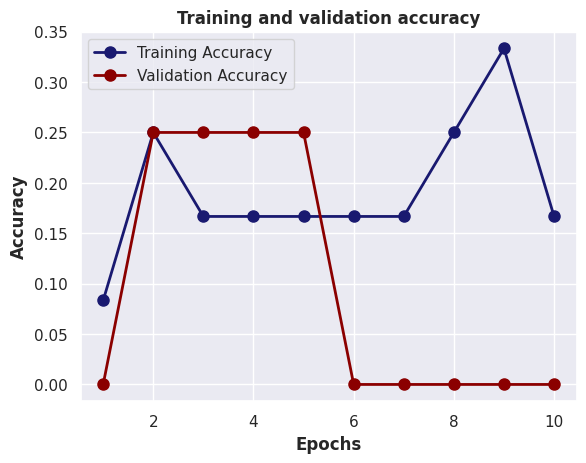

In [29]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')
                  #=========================================================
                  ############### Epochs vs Validation Accuracy Plot ##########
                  #==========================================================

plt.plot(epochs, acc, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

From the **accuracy plot** it is observed that, the validation accuracy not improved more than 85%, it is due to multiclass imbalanced classification probelm. Moreover by proper tunning the vocabulary size the model perfoemance can be improved.

# Model Performance on Test Set

In [30]:
# Load the saved model
model = load_model(path+'Document.h5')

In [31]:
class_names = ['Accident' ,'Amusement' ,'Art' ,'Business' ,'Chakri', 'Corporate', 'Employment','Health', 'Lifestyle', 'Opinion' ,'Politics' ,'Sports']
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Accident','1':'Amusement','2':'Art','3':'Business','4':'Chakri','5':'Corporate','6':'Employment',
                              '7': 'Health','8':'Lifestyle','9':'Opinion','10':'Politics','11':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

,precision,recall,f1-score,support
Business,0.0,0.0,0.0,0.0
Chakri,0.0,0.0,0.0,1.0
Politics,0.0,0.0,0.0,1.0
accuracy,0.0,0.0,0.0,0.0
macro avg,0.0,0.0,0.0,2.0
weighted avg,0.0,0.0,0.0,2.0


In [32]:
def encoded_texts(dataset,padding_length,max_words):

  '''
  This function will encoded the text into a sequence of numbers

  Args:
  dataset: a dataset
  padding_length: maximum length of a encoded texte
  max_words : Number of words 

  returns:
  corpus: Number of encoded texts
  labels: encoded labels
  '''
  
  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
  
 

 # Fit the tokenizer
  tokenizer.fit_on_texts(dataset.cleaned)
  #============================== Tokenizer Info =================================
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  #=============================== Print all the information =========================
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )    
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(dataset.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))  
  # print(dataset.cleaned[10],"\n",sequences[10]) 

  #==================================== Pad Sequences ============================== 
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  # print("\n\t\t\t====== Paded Sequences ======\n",dataset.cleaned[10],"\n",corpus[10])   

  #=================================     Label Encoding ================================
  labels = label_encoding(dataset,True)

   # save the tokenizer into a pickle file
  with open(path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels
  
#call the function
num_words = 5000
corpus,labels = encoded_texts(dataset,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
হবে 	 9
জন্য 	 9
করতে 	 8
ও 	 8
আর 	 8
এই 	 5
করা 	 5
হবে। 	 5
এ 	 5
দেশের 	 4

Words --> Documents:
করতে 	 7
জন্য 	 7
এই 	 5
করা 	 5
হবে 	 5
ও 	 5
বাংলাদেশ 	 4
দেশের 	 4
এ 	 4
হবে। 	 4

Words --> Index:
ডাকেন। 	 598
বলেও 	 597
শিক্ষক’ 	 596
‘কৃষকের 	 595
অনেকে 	 594
উঠেছেন। 	 593
ভরসাস্থল 	 592
চাষিদের 	 591
তরুণ–যুবক 	 590
গ্রামের 	 589

Total Documents --> 18

			====== Encoded Sequences ====== 
Found 598 unique tokens

			===== Label Encoding ===== 
Class Names:--> ['Accident' 'Amusement' 'Art' 'Business' 'Chakri' 'Corporate' 'Employment'
 'Health' 'Lifestyle' 'Opinion' 'Politics' 'Sports']

Shape of Encoded Corpus =====> (18, 300)


By observing precision,recall and f1-score we can see that all the classes are classified reasonably well except **Art and Environment.** 

## Confusion Matrix

1/1 [==============================] - 0s 25ms/step


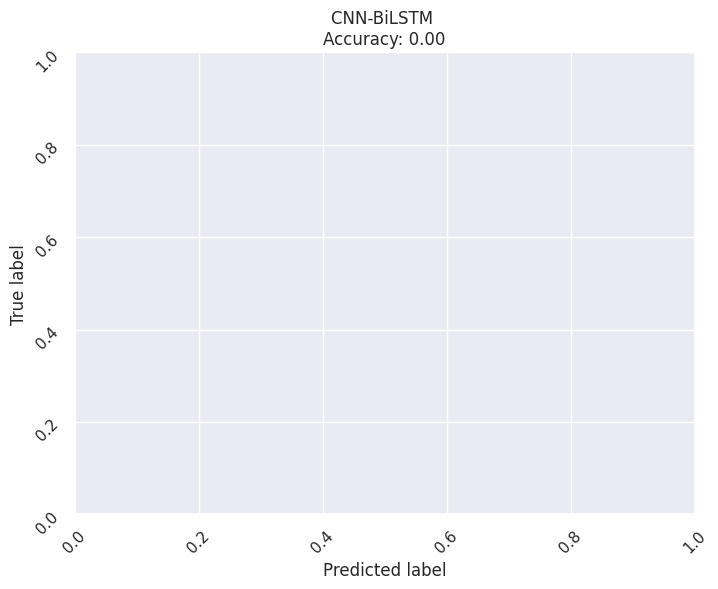

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred) 

class_names = ['Accident' ,'Amusement' ,'Art' ,'Business' ,'Chakri', 'Corporate', 'Employment','Health', 'Lifestyle', 'Opinion' ,'Politics' ,'Sports']
# Transform to df for easier plotting
# cm_df = pd.DataFrame(cm,index = class_names,columns = class_names)

plt.figure(figsize=(8,6))
# sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
plt.title('CNN-BiLSTM \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


The confusion matrix provides a good understanding about how many documents are correctly classified in each class and which classes get confused during classification. Here, we can see that Art, Entertainment, Politics category gives larger number of false classified result.  

## Test with our own news 

In [34]:
sample_news = 'াশ করেছে। এ প্রতিষ্ঠানে ১৬ ক্যাটাগরির পদে ৯ম থেকে ১২তম গ্রেডে স্থায়ী ও অস্থায়ী ভিত্তিত'
cleaned_news = cleaning_documents(sample_news)

class_names = ['Accident' ,'Amusement' ,'Art' ,'Business' ,'Chakri', 'Corporate', 'Employment','Health', 'Lifestyle', 'Opinion' ,'Politics' ,'Sports']

#print(cleaned_news)
# load the saved tokenizer
with open(path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
#print(len(loaded_tokenizer.word_index))
seq= loaded_tokenizer.texts_to_sequences([cleaned_news])
padded = pad_sequences(seq, value=0.0,padding='post', maxlen= 300 )
pred = model.predict(padded)
print(pred) 
class_names[np.argmax(pred)] 

print(class_names)


1/1 [==============================] - 0s 68ms/step
[[0.07818535 0.09618838 0.0038297  0.15470974 0.00344949 0.09503961
  0.09488276 0.14835373 0.16372982 0.04148826 0.11391912 0.00622403]]
['Accident', 'Amusement', 'Art', 'Business', 'Chakri', 'Corporate', 'Employment', 'Health', 'Lifestyle', 'Opinion', 'Politics', 'Sports']


In [35]:
# print top most classes
y_pred = pred.reshape(-1)
class_labels=[(class_names[i],round(prob*100,2)) for i,prob in enumerate(y_pred) if prob > 0.1]

for k, v in class_labels:
  print(k,'====>',v,'%')

Business ====> 15.47 %
Health ====> 14.84 %
Lifestyle ====> 16.37 %
Politics ====> 11.39 %
